# Projeto Titanic

Este é um projeto de análise e modelagem de dados do Titanic, com o objetivo de prever quais passageiros sobreviveram ao naufrágio. O projeto é baseado em um famoso dataset disponível no Kaggle, contendo informações sobre passageiros do Titanic, como idade, sexo, classe da cabine, entre outras.

O projeto será dividido em três etapas principais: análise exploratória dos dados, pré-processamento dos dados e modelagem. Na etapa de análise exploratória, serão explorados os dados, identificando características dos passageiros e relações entre as variáveis. Na etapa de pré-processamento, serão tratados os dados faltantes, transformadas as variáveis categóricas em numéricas, e criadas novas features que possam melhorar o desempenho dos modelos preditivos. Por fim, na etapa de modelagem, serão construídos diferentes modelos e avaliados seus desempenhos a partir das métricas.

O objetivo final do projeto é criar um modelo preditivo que possa prever com precisão quais passageiros sobreviveriam ao naufrágio do Titanic, utilizando técnicas de análise e modelagem de dados. 

# Importando bibliotecas e dados

In [43]:
# Importação das bibliotecas
import pandas as pd # manipulação e análise de dados
import numpy as np # computação científica
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados
import re # expressões regulares
import tensorflow as tf # biblioteca de machine learning

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler # padronização de dados
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif # seleção de atributos
from sklearn.model_selection import train_test_split # divisão dos dados em treino e teste
from sklearn.ensemble import RandomForestClassifier # modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier # modelo de machine learning
from sklearn.tree import DecisionTreeClassifier # modelo de machine learning
from sklearn.metrics import accuracy_score # métrica de avaliação

# Analise exploratória dos dados

Essa etapa é importante para entendermos melhor os dados e como eles se relacionam, e também para identificar possíveis problemas que possam afetar a modelagem.

In [44]:
#Lendo o conjunto de dados Titanic

train = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

Agora vamos fazer uma análise inicial dos dados, verificando dimensões, tipos de dados, valores faltantes, etc.

In [45]:
print(train.shape) # imprime o número de linhas e colunas do conjunto de dados
print(teste.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [46]:
print(train.columns) # imprime o nome das colunas do conjunto de dados
print(teste.columns)
print(submission.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


In [47]:
print(train.dtypes) # imprime o tipo de dado de cada coluna
print(teste.dtypes)
print(submission.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId    int64
Survived       int64
dtype: object


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Podemos notar que o conjunto de dados possui informações sobre o PassengerId, se o passageiro sobreviveu (Survived), a classe (Pclass) em que viajou, o nome (Name), gênero (Sex), idade (Age), número de irmãos/cônjuges a bordo (SibSp), número de pais/filhos a bordo (Parch), número do ticket (Ticket), tarifa (Fare), cabine (Cabin) e porto de embarque (Embarked).

Agora vamos verificar a quantidade de valores faltantes em cada coluna.

In [49]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos observar que há valores ausentes nas variáveis Age, Cabin e Embarked. Para tratar esses valores ausentes, podemos realizar algumas etapas de limpeza dos dados.

Primeiro vamos verificar a distribuição das variaveis numéricas:

In [50]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Agora vamos começar a preencher os dados faltantes. Primeiro vamos preencher os valores faltantes da variável Age. Para isso, vamos utilizar a média da idade de cada classe.

In [51]:
#extração de títulos
train['Title'] = train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
teste['Title'] = teste['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#calculando a média de idade por título
age_means = train.groupby('Title')['Age'].mean()

#substituindo os valores nulos pela média de idade por título
for index, row in train.iterrows():
    if pd.isnull(row['Age']):
        train.loc[index, 'Age'] = age_means[row['Title']]
        print( train.loc[index, 'Age'])

for index, row in teste.iterrows():
    if pd.isnull(row['Age']):
        teste.loc[index, 'Age'] = age_means[row['Title']]

#substituindo os valores nulos pela média na coluna Fare do conjunto de teste
fare_mean = train['Fare'].mean()
teste['Fare'].fillna(fare_mean, inplace=True)

combined_data = pd.concat([train, teste])

#titulos raros
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
combined_data['Title'] = combined_data['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

#codificando os títulos
label_encoder = LabelEncoder()
combined_data['Title'] = label_encoder.fit_transform(combined_data['Title'])

# Divisão novamente em conjuntos de treinamento e teste
train = combined_data[:len(train)]
teste = combined_data[len(train):]

# Criar uma variável para representar o tamanho da família
train.loc[:, 'FamilySize'] = train['SibSp'] + train['Parch'] + 1
teste.loc[:, 'FamilySize'] = teste['SibSp'] + teste['Parch'] + 1

32.368090452261306
32.368090452261306
35.898148148148145
32.368090452261306
21.773972602739725
32.368090452261306
35.898148148148145
21.773972602739725
32.368090452261306
32.368090452261306
32.368090452261306
32.368090452261306
21.773972602739725
32.368090452261306
32.368090452261306
32.368090452261306
4.574166666666667
32.368090452261306
32.368090452261306
21.773972602739725
32.368090452261306
32.368090452261306
32.368090452261306
32.368090452261306
21.773972602739725
32.368090452261306
32.368090452261306
21.773972602739725
35.898148148148145
32.368090452261306
32.368090452261306
4.574166666666667
35.898148148148145
32.368090452261306
4.574166666666667
21.773972602739725
32.368090452261306
32.368090452261306
35.898148148148145
32.368090452261306
21.773972602739725
32.368090452261306
32.368090452261306
32.368090452261306
21.773972602739725
21.773972602739725
21.773972602739725
21.773972602739725
32.368090452261306
35.898148148148145
32.368090452261306
21.773972602739725
32.368090452261

C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\4016776958.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'FamilySize'] = train['SibSp'] + train['Parch'] + 1
C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\4016776958.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste.loc[:, 'FamilySize'] = teste['SibSp'] + teste['Parch'] + 1


Então excluímos a coluna Cabin, pois ela possui muitos valores faltantes, e a coluna Ticket, pois não parece ter relação com a sobrevivência. E para a coluna Embarked, vamos preencher os valores faltantes com o valor mais comum (moda) da coluna.

In [52]:
#excluindo a coluna cabin
train.drop('Cabin', axis=1, inplace=True)
teste.drop('Cabin', axis=1, inplace=True)

#excluindo a coluna ticket
train.drop('Ticket', axis=1, inplace=True)
teste.drop('Ticket', axis=1, inplace=True)

#preenchendo os valores nulos da coluna Embarked
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
teste['Embarked'].fillna(teste['Embarked'].mode()[0], inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\506451837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Cabin', axis=1, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\506451837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste.drop('Cabin', axis=1, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\506451837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Ticket', a

Agora temos um conjunto de dados sem valores faltantes

In [53]:
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64


# Graficos
agora vamos plotar alguns gráficos para entender melhor os dados.

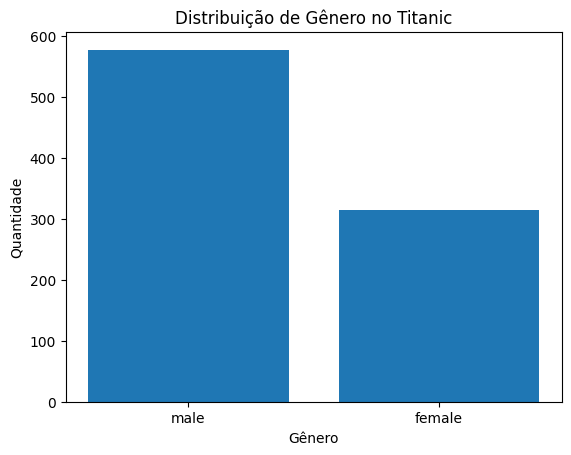

In [54]:
# Define os dados a serem plotados
gender_count = train['Sex'].value_counts()

# Define o gráfico
plt.bar(gender_count.index, gender_count.values)

# Define o título e as legendas dos eixos
plt.title('Distribuição de Gênero no Titanic')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

# Exibe o gráfico
plt.savefig('GêneroTitanic', dpi= 300)
plt.show()

A coluna mais importante para a nossa análise é a coluna Survived, pois é ela que queremos prever. Vamos verificar a distribuição dos dados dessa coluna.

In [55]:
train['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

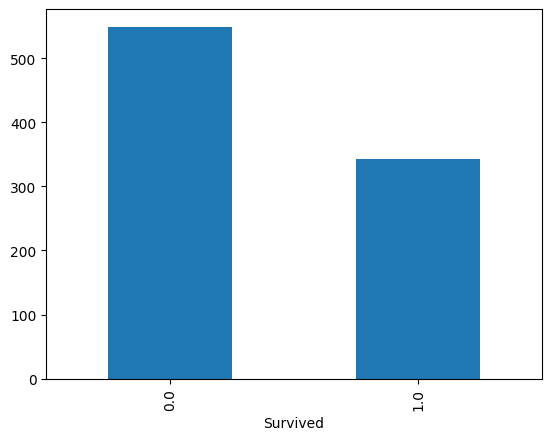

In [56]:
train['Survived'].value_counts().plot.bar()
plt.savefig('Survived', dpi= 300)

Gráfico de sobreviventes por gênero.

In [57]:
train[train['Sex'] == 'male']['Survived'].value_counts()

Survived
0.0    468
1.0    109
Name: count, dtype: int64

In [58]:
train[train['Sex'] == 'female']['Survived'].value_counts()

Survived
1.0    233
0.0     81
Name: count, dtype: int64

Distribuição de sobreviventes por classe.

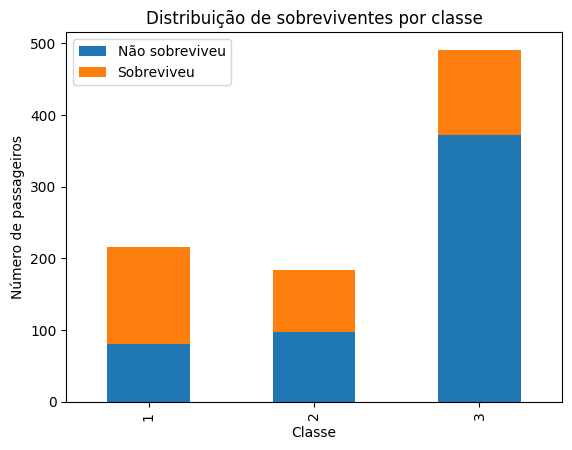

In [59]:
#criando tabela pivô de sobreviventes por classe
survived_by_class = train[['Survived', 'Pclass']].groupby(['Pclass', 'Survived']).size().unstack()

#plotando gráfico de barras empilhadas
survived_by_class.plot(kind='bar', stacked=True)
plt.title('Distribuição de sobreviventes por classe')
plt.xlabel('Classe')
plt.ylabel('Número de passageiros')
plt.legend(['Não sobreviveu', 'Sobreviveu'])
plt.savefig('SurvivedClass.png', dpi= 300)
plt.show()


Distribuição de sobreviventes por porto de embarque.

In [60]:
train.groupby(['Embarked', 'Survived'])['PassengerId'].count().unstack()

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,219


Distribuição de sobreviventes por idade.

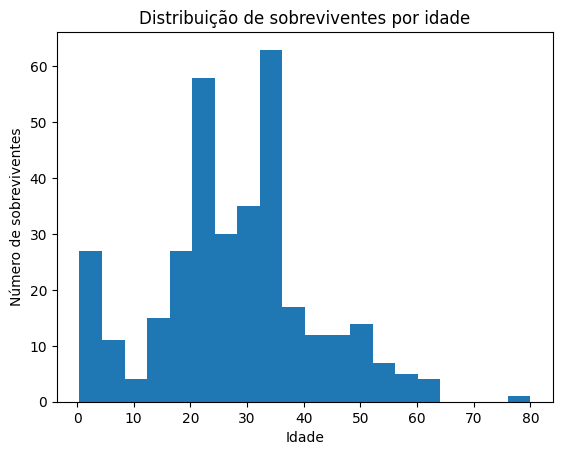

In [61]:
# Seleciona apenas os sobreviventes
survived_df = train[train['Survived'] == 1]

# Plota o histograma
plt.hist(survived_df['Age'], bins=20)
plt.xlabel('Idade')
plt.ylabel('Número de sobreviventes')
plt.title('Distribuição de sobreviventes por idade')
plt.savefig('SurvivedAge.png', dpi= 300)
plt.show()

# Transformando variáveis categóricas em numéricas

In [62]:
# Transformando variáveis categóricas em numéricas
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
teste['Sex'] = teste['Sex'].map({'female': 0, 'male': 1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
teste['Embarked'] = teste['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\1313493225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\1313493225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['Sex'] = teste['Sex'].map({'female': 0, 'male': 1})
C:\Users\gabri\AppData\Local\Temp\ipykernel_4912\1313493225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [63]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,5,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,6,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,2,1


In [64]:
teste.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,NaN,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,2,5,1
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,6,2
2,894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,2,5,1


## Matriz de Correlação

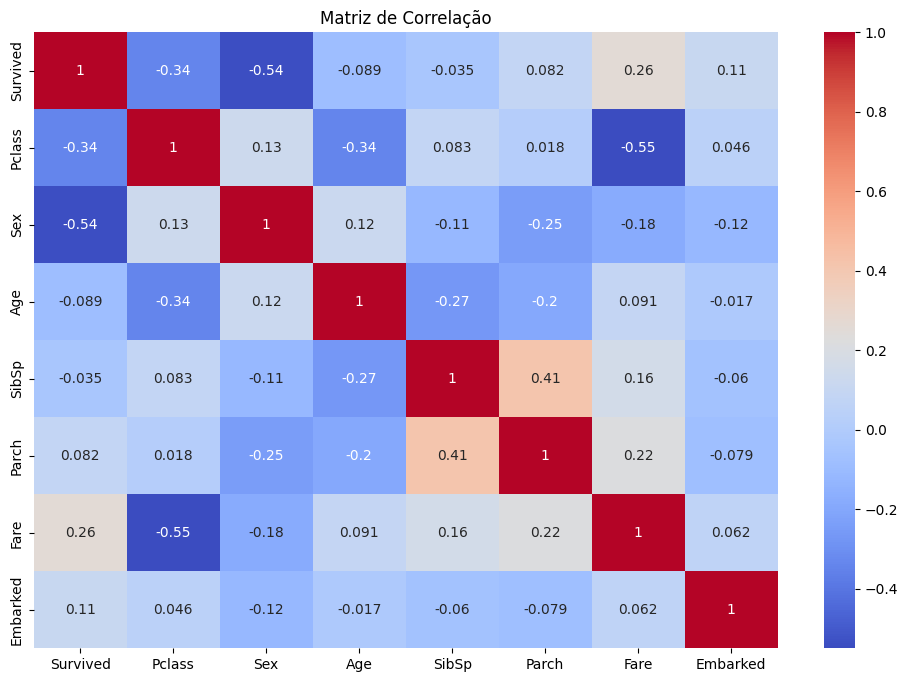

In [65]:
# Removendo colunas categóricas e não relevantes
numeric_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
numeric_data = train[numeric_columns]

# Criando uma matriz de correlação
correlation_matrix = numeric_data.corr()

# Plotando a matriz de correlação como um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.savefig('Correlação.png', dpi= 300)
plt.show()


Nessa matriz, cada célula representa a correlação entre duas variáveis. Por exemplo, a célula na interseção da linha "Survived" e da coluna "Sex" contém o valor -0.5434, o que indica uma correlação negativa moderada entre a sobrevivência e o gênero. Isso significa que ser do sexo feminino (0) tem uma correlação negativa com a sobrevivência (quanto maior o valor de "Sex", menor a chance de sobrevivência).

In [66]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.754659,0.523008,0.381594,32.204208,0.361392,4.421998,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.277179,1.102743,0.806057,49.693429,0.635673,1.616394,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.773973,0.000000,0.000000,7.910400,0.000000,3.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,0.000000,5.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.898148,1.000000,0.000000,31.000000,1.000000,5.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,8.000000,11.000000


## Seleção de atributos relevantes para o modelo

In [67]:
# Selecionando as features relevantes
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']
X_train = train[selected_features]
y_train = train['Survived']
X_test = teste[selected_features]

## Padronização dos dados usando Scaler

In [68]:
# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Seleção dos K melhores atributos

In [69]:
# Ajustando valores negativos para não negativos
X_train_scaled = X_train_scaled - np.min(X_train_scaled)
X_test_scaled = X_test_scaled - np.min(X_test_scaled)


# Selecionando os K melhores atributos
k = 5
metrics = [('chi2', SelectKBest(k=k)),
           ('f_classif', SelectKBest(k=k, score_func=f_classif)),
           ('mutual_info_classif', SelectKBest(k=k, score_func=mutual_info_classif))]

for metric_name, selector in metrics:
    # Selecione os atributos mais relevantes usando a métrica atual
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

## Divisão do conjunto de treino

In [70]:
# Dividindo os dados em treino e validação
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)


## Treinando o Modelo em ForestClassifier  e Avaliação do Modelo

In [71]:
# define o grid de parâmetros para o Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Treinando o modelo
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search.fit(X_train_final, y_train_final)
print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}


In [72]:
# Treinando o modelo com os melhores parâmetros
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)
best_rf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [73]:
# Avaliando o modelo
y_pred_val = best_rf_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Acurácia na validação:", accuracy_val)

Acurácia na validação: 0.8379888268156425


## Treinando o Modelo em DecisionTree  e Avaliação do Modelo

In [74]:
# definindo o grid de parâmetros para o Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Treinando o modelo Decision Tree
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search.fit(X_train_final, y_train_final)
print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [75]:
best_dt_model = DecisionTreeClassifier(**grid_search.best_params_)
best_dt_model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5)

In [76]:
# Avaliando o modelo Decision Tree
y_pred_val_dt = best_dt_model.predict(X_val)
accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
print("Acurácia na validação (Decision Tree):", accuracy_val_dt)

Acurácia na validação (Decision Tree): 0.8212290502793296


## Treinando o Modelo em KNN  e Avaliação do Modelo

In [77]:
# definindo o grid de parâmetros para o KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# Treinando o modelo KNN
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search.fit(X_train_final, y_train_final)
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [78]:
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model.fit(X_train_final, y_train_final)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [79]:
# Avaliando o modelo KNN
y_pred_val_knn = best_knn_model.predict(X_val)
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
print("Acurácia na validação (KNN):", accuracy_val_knn)

Acurácia na validação (KNN): 0.8379888268156425


## Previsões no conjunto de teste e calculo de acurácia dos modelos

In [80]:
# Fazendo previsões nos dados de teste usando os três modelos
y_pred_test_rf = best_rf_model.predict(X_test_selected)
y_pred_test_knn = best_knn_model.predict(X_test_selected)
y_pred_test_dt = best_dt_model.predict(X_test_selected)

In [81]:
# Calculando a acurácia nos dados de teste para cada modelo
accuracy_test_rf = accuracy_score(submission['Survived'], y_pred_test_rf)
accuracy_test_knn = accuracy_score(submission['Survived'], y_pred_test_knn)
accuracy_test_dt = accuracy_score(submission['Survived'], y_pred_test_dt)

print("Acurácia nos dados de teste (Random Forest):", accuracy_test_rf)
print("Acurácia nos dados de teste (KNN):", accuracy_test_knn)
print("Acurácia nos dados de teste (Decision Tree):", accuracy_test_dt)

Acurácia nos dados de teste (Random Forest): 0.7918660287081339
Acurácia nos dados de teste (KNN): 0.8253588516746412
Acurácia nos dados de teste (Decision Tree): 0.7751196172248804


## Validação Cruzada dos modelos

In [82]:
# Realizar a validação cruzada Random Forest
scores = cross_val_score(best_rf_model, X_train_final, y_train_final, cv=5)  # cv é o número de folds (5 neste exemplo)

# Exibir as pontuações de acurácia em cada fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

# Exibir a pontuação média de acurácia
print(f"Acurácia média: {scores.mean()}")

Fold 1: 0.8181818181818182
Fold 2: 0.8461538461538461
Fold 3: 0.795774647887324
Fold 4: 0.8309859154929577
Fold 5: 0.823943661971831
Acurácia média: 0.8230079779375554


In [83]:
# Realizar a validação cruzada Decision Tree
scores = cross_val_score(best_dt_model, X_train_final, y_train_final, cv=5)  # cv é o número de folds (5 neste exemplo)

# Exibir as pontuações de acurácia em cada fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

# Exibir a pontuação média de acurácia
print(f"Acurácia média: {scores.mean()}")

Fold 1: 0.7972027972027972
Fold 2: 0.8041958041958042
Fold 3: 0.8169014084507042
Fold 4: 0.795774647887324
Fold 5: 0.7887323943661971
Acurácia média: 0.8005614104205654


In [84]:
# Realizar a validação cruzada KNN
scores = cross_val_score(best_knn_model, X_train_final, y_train_final, cv=5)  # cv é o número de folds (5 neste exemplo)

# Exibir as pontuações de acurácia em cada fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

# Exibir a pontuação média de acurácia
print(f"Acurácia média: {scores.mean()}")

Fold 1: 0.8391608391608392
Fold 2: 0.8391608391608392
Fold 3: 0.823943661971831
Fold 4: 0.8028169014084507
Fold 5: 0.8028169014084507
Acurácia média: 0.8215798286220822
